<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/%E7%AC%AC8%E5%9B%9E%E8%AC%9B%E7%BE%A9_%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%E3%81%9D%E3%81%AE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8. <font color='crimson'>Text Analysis - Part II </font>

**Today's highlight**：

- WordCloud

- Sentiment Analysis




## 8.1 <font color="Crimson">**Word Cloud**</font>

Word cloud is a popular techniques that intuitively show the important words contains in a text by controlling the size of word using Frequency.

https://raw.githubusercontent.com/dgod1028/Research/main/data/sendai_eco.txt

Let's download the text file first.

In [1]:
!wget https://raw.githubusercontent.com/dgod1028/Research/main/data/sendai_eco.txt

--2023-08-08 14:44:26--  https://raw.githubusercontent.com/dgod1028/Research/main/data/sendai_eco.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1513 (1.5K) [text/plain]
Saving to: ‘sendai_eco.txt’

sendai_eco.txt      100%[===================>]   1.48K  --.-KB/s    in 0s      

2023-08-08 14:44:26 (23.7 MB/s) - ‘sendai_eco.txt’ saved [1513/1513]



In [2]:
with open('sendai_eco.txt', 'r') as f:
  text = f.read()
text

"Economy\nSendai is the center of the Tōhoku region's economy, and is the base of the region's logistics and transportation. The GDP in Greater Sendai, Sendai Metropolitan Employment Area (1.6 million people), is US$61.7 billion in 2010.[16][17] Sendai city by itself has a nominal GDP of approximately US$50 billion as of 2015.[18] The city's economy heavily relies upon retail and services – the two industries provide approximately two thirds of the employment and close to half of the establishments.\n\nSendai is frequently called a branch-office economy[by whom?], because very few major companies are headquartered in the city. Various authorities are cooperating to alleviate this problem, primarily by encouraging high-tech ventures from Tohoku University, which is well known for its science and engineering departments. There are also incentives for startups available from the prefectural government.[19]\n\nTohoku Electric Power, a major regional supplier of electric power, has its head

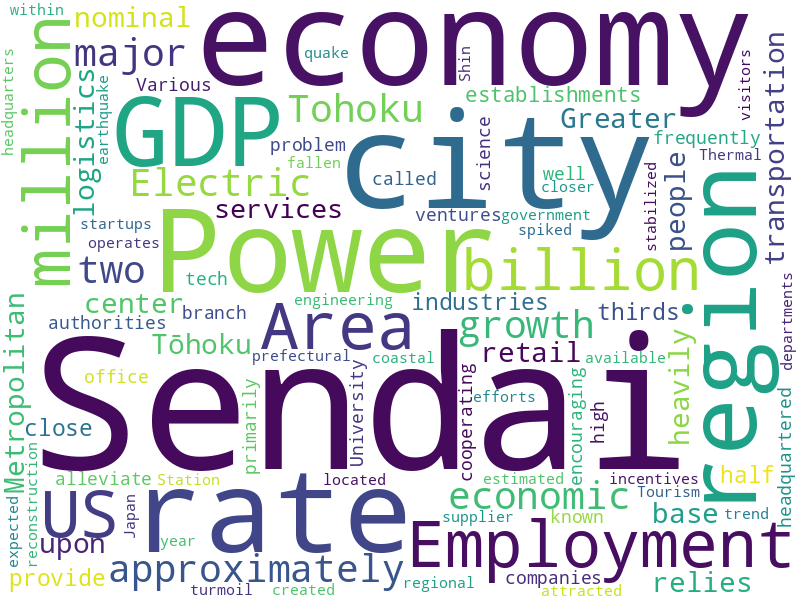

In [3]:
from wordcloud import WordCloud # ワードクラウドのライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ


wordcloud = WordCloud(background_color="white",
    width=800,height=600).generate(text)

wordcloud.to_image()

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text2 = text

tmp = text2.split(' ') #単語を分割
new_text = [word for word in tmp if word not in stop_words ] #stopwordを除去
new_text2 = ' '.join(new_text) #結合

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


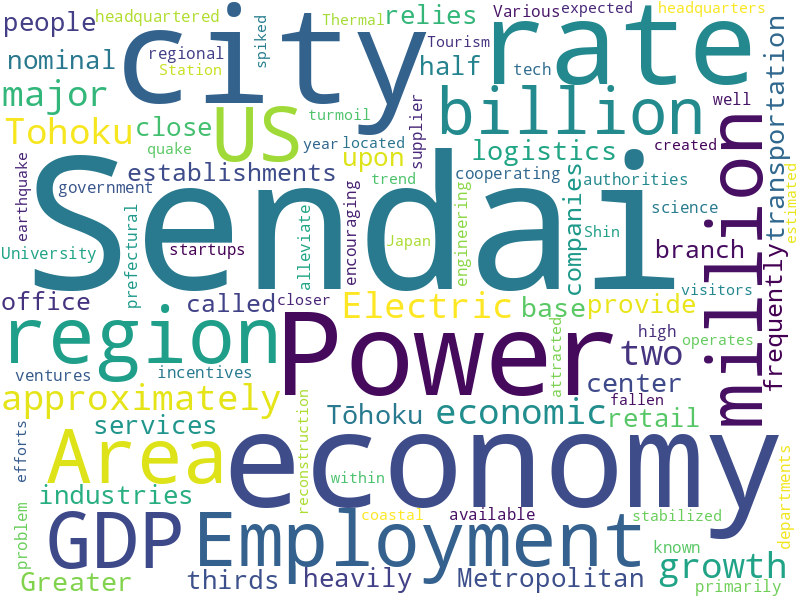

In [5]:
wordcloud = WordCloud(background_color="white",
    width=800,height=600).generate(new_text2)

wordcloud.to_image()

Also, if you want only the nouns, then you can use textblob.

In [6]:
from textblob import TextBlob
nltk.download('brown') # requirements
nltk.download('punkt') # requirements
blob = TextBlob(new_text2)
blob.noun_phrases


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['economy sendai', 'tōhoku', "region 's economy", "base region 's logistics transportation", 'gdp', 'sendai', 'sendai', 'employment', 'us $', '] [', 'sendai', 'gdp', 'us $', "city 's economy", 'retail services –', 'thirds employment', 'sendai', 'branch-office economy [', 'major companies', 'various authorities', 'alleviate problem', 'encouraging high-tech ventures', 'tohoku', 'science engineering departments', 'incentives startups', 'available prefectural government', 'tohoku', 'power', 'major regional supplier', 'electric power', 'sendai', 'shin-sendai thermal power', 'sendai', 'economic growth rate', 'japan', 'growth rate', 'coastal areas', '% reconstruction efforts', 'tourism', 'sendai'])

#### <font color='crimson'>**[Practice 1]Remove punctuations and visualize using wordcloud** (10 mins)</font>

1. Choose only noun words for the text.

1. Remove the punctuations and non-character words such as ' $ [ ], then make wordcloud again.

In [7]:
# Start here

# 1
new_text = ' '.join(blob.noun_phrases)
new_text

# 2
import re
text3 = re.subn('\n', ' ', new_text)[0]
text4 = re.subn('[^\w\s]', '', text3)[0]
text5 = re.subn('\s+',' ', text4)[0]

text5

'economy sendai tōhoku region s economy base region s logistics transportation gdp sendai sendai employment us sendai gdp us city s economy retail services thirds employment sendai branchoffice economy major companies various authorities alleviate problem encouraging hightech ventures tohoku science engineering departments incentives startups available prefectural government tohoku power major regional supplier electric power sendai shinsendai thermal power sendai economic growth rate japan growth rate coastal areas reconstruction efforts tourism sendai'

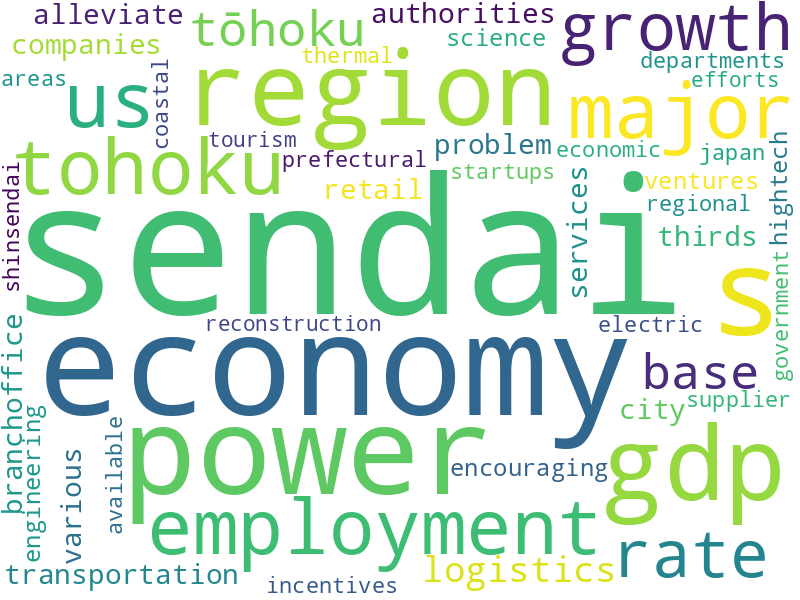

In [8]:
wordcloud = WordCloud(background_color="white",
    width=800,height=600).generate(text5)

wordcloud.to_image()

## 8.2 <font color="Crimson">**Sentiment**</font>

Sentiment analysis is a method for analyzing latent emotions from text. Emotion analysis methods are diversifying, and various methods have been proposed in addition to the two options of 'positive emotion' and 'negative emotion'.

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=18zHK9ZuFIoaTn_b0wphrl4DWhkb_vZFB" width="60%">
</div>





In the past, we need to train the sentiment analysis models with manually tagged data by ourselves. But nowadays there are various open-sourced sentiment analysis models. Thus, we don't need to train the models anymore in most cases.

In this lecture we will use a simple sentiment model trained by other researchers.

In [9]:
# install the module
!pip install -q transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00


In [10]:
# Sentiment analysis
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", 'distilbert-base-uncased-finetuned-sst-2-english')
data = ["This is great!", "I hate programming!"]
sentiment_pipeline(data)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.9996341466903687}]

But this model not work well sometimes.

In [ ]:
data = "This is a desk."
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.8734818696975708}]

### <font color='crimson'>**[Practice 2]Sentiment Analysis** (remained)</font>

Here is the twitter data posted by Trump from 2009 ~ 20016.

1. Calculate the proportion of **positive tweets** for the **first 200 tweets**. You only need to use column 'Tweet' for this problem.

1. Create 2 WordCloud based on the positive and negative comments,respectively.

★ Challenge ★

1. Download the sentiments file (I classified all the tweets), and using the tweets data and this file, calculate the proportion of **positive tweets** for each year, respectively.

1. Visualize the proportion of positive tweets for each year.

1. How about calculate the proportion of the positive tweets for each month?

In [13]:
import pandas as pd
import numpy as np

df_tweets = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/2016_12_05-TrumpTwitterAll.csv',encoding='cp932')
df_tweets

,Date,Time,Tweet,Client,Client Simplified
0,12/05/2016,12:00:27 PM,If the press would cover me accurately & honor...,Twitter Web Client,Twitter Web Client
1,12/05/2016,9:53:11 AM,I am thrilled to nominate Dr. @RealBenCarson a...,Twitter for iPhone,Twitter for iPhone
2,12/04/2016,6:30:22 PM,their country (the U.S. doesn't tax them) or t...,Twitter for Android,Twitter for Android
3,12/04/2016,6:23:55 PM,Did China ask us if it was OK to devalue their...,Twitter for Android,Twitter for Android
4,12/04/2016,5:47:21 PM,".@FoxNews will be re-running ""Objectified: Don...",Twitter for Android,Twitter for Android
...,...,...,...,...,...
30073,05/12/2009,10:07:28 AM,"""My persona will never be that of a wallflower...",Twitter Web Client,Twitter Web Client
30074,05/08/2009,4:40:15 PM,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,Twitter Web Client
30075,05/08/2009,9:38:08 AM,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,Twitter Web Client
30076,05/04/2009,9:00:10 PM,Donald Trump will be appearing on The View tom...,Twitter Web Client,Twitter Web Client


In [14]:
tweets = df_tweets['Tweet'][:200].tolist()
sents = sentiment_pipeline(tweets)

In [15]:
sents


[{'label': 'NEGATIVE', 'score': 0.9997783303260803},
 {'label': 'POSITIVE', 'score': 0.9984751343727112},
 {'label': 'NEGATIVE', 'score': 0.9921970367431641},
 {'label': 'NEGATIVE', 'score': 0.9995797276496887},
 {'label': 'NEGATIVE', 'score': 0.9866687059402466},
 {'label': 'NEGATIVE', 'score': 0.9997541308403015},
 {'label': 'NEGATIVE', 'score': 0.9813768267631531},
 {'label': 'POSITIVE', 'score': 0.9950882792472839},
 {'label': 'NEGATIVE', 'score': 0.9952906370162964},
 {'label': 'NEGATIVE', 'score': 0.9938435554504395},
 {'label': 'NEGATIVE', 'score': 0.9994345307350159},
 {'label': 'NEGATIVE', 'score': 0.9659892320632935},
 {'label': 'NEGATIVE', 'score': 0.9989173412322998},
 {'label': 'POSITIVE', 'score': 0.9996168613433838},
 {'label': 'POSITIVE', 'score': 0.994712769985199},
 {'label': 'POSITIVE', 'score': 0.9995182752609253},
 {'label': 'NEGATIVE', 'score': 0.9994326233863831},
 {'label': 'NEGATIVE', 'score': 0.9989601373672485},
 {'label': 'POSITIVE', 'score': 0.9998445510864

In [ ]:
sents2 = [i['label'] for i in sents]
sents2

In [16]:
a = [1, 2, 3, 4]
np.where(np.array(a)==3)

(array([2]),)

In [19]:
positive_inds = np.where(np.array(sents2) == 'POSITIVE')[0]
negative_inds = np.where(np.array(sents2) == 'NEGATIVE')[0]
positive_inds

array([  1,   7,  13,  14,  15,  18,  19,  20,  21,  22,  23,  25,  27,
        28,  30,  33,  34,  35,  37,  38,  41,  47,  52,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  75,  78,  79,  81,  87,  88,  89,
        91,  96,  97,  99, 100, 102, 103, 104, 107, 108, 109, 110, 112,
       113, 114, 116, 117, 118, 122, 125, 126, 127, 128, 130, 131, 132,
       133, 135, 139, 141, 142, 144, 145, 146, 150, 152, 154, 160, 162,
       164, 169, 173, 178, 182, 183, 186, 187, 188, 190, 194, 197, 199])

In [20]:
len(positive_inds) / 200

0.455

In [21]:
positive_texts = ' '.join(df_tweets['Tweet'].iloc[positive_inds].tolist())
negative_texts = ' '.join(df_tweets['Tweet'].iloc[negative_inds].tolist())

In [22]:
import re
positive_texts2 = re.subn('htts?\S+', ' ', positive_texts)[0]
negative_texts2 = re.subn('htts?\S+', ' ', negative_texts)[0]

In [23]:
positive_texts2

'I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing and Urban Development…   these companies are able to move between all 50 states, with no tax or tariff being charged. Please be forewarned prior to making a very ... Our great VPE, @mike_pence, is in Louisiana campaigning for John Kennedy for US Senate. John will be a tremendous help to us in Washington. State Treasurer John Kennedy is my choice for US Senator from Louisiana. Early voting today; election next Saturday. "@TigerWoods: Can’t wait to get back out there and mix it up with the boys. ?TW #heroworldchallenge" Great to have you back Tiger - Special! The President of Taiwan CALLED ME today to wish me congratulations on winning the Presidency. Thank you! Thank you Ohio! Together, we made history ? and now, the real work begins. America will start winning again!…   Heading to U.S. Bank Arena in Cincinnati, Ohio for a 7pm rally. Join me! Tickets:   Getting ready to leave for the Great Sta

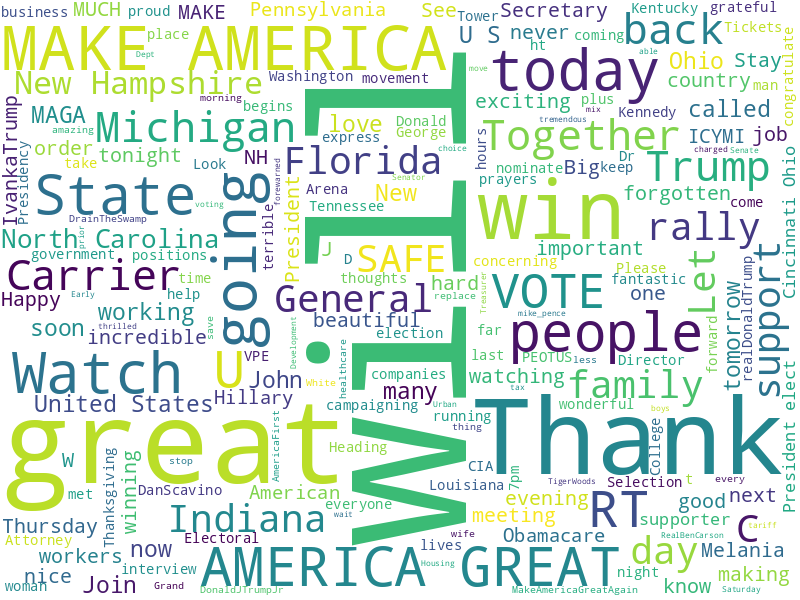

In [24]:
wordcloud = WordCloud(background_color="white",
    width=800,height=600).generate(positive_texts2)

wordcloud.to_image()

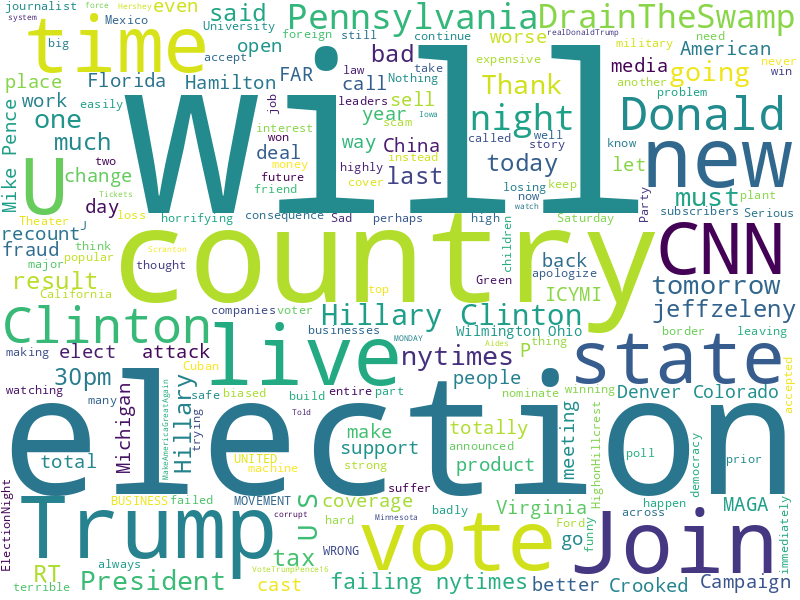

In [25]:
wordcloud = WordCloud(background_color="white",
    width=800,height=600).generate(negative_texts2)

wordcloud.to_image()

In [26]:
# Challenge

# Download the file first!

!wget https://github.com/dgod1028/Research/raw/main/data/sents.pickle # download file


--2023-08-08 15:20:16--  https://github.com/dgod1028/Research/raw/main/data/sents.pickle
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgod1028/Research/main/data/sents.pickle [following]
--2023-08-08 15:20:16--  https://raw.githubusercontent.com/dgod1028/Research/main/data/sents.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 571660 (558K) [application/octet-stream]
Saving to: ‘sents.pickle’

sents.pickle        100%[===================>] 558.26K  --.-KB/s    in 0.05s   

2023-08-08 15:20:17 (10.5 MB/s) - ‘sents.pickle’ saved [571660/571660]



In [28]:
import pickle
all_sents = pickle.load(open('sents.pickle','rb'))
all_sents

[{'label': 'NEGATIVE', 'score': 0.9997783303260803},
 {'label': 'POSITIVE', 'score': 0.9984751343727112},
 {'label': 'NEGATIVE', 'score': 0.9921970367431641},
 {'label': 'NEGATIVE', 'score': 0.9995797276496887},
 {'label': 'NEGATIVE', 'score': 0.9866687059402466},
 {'label': 'NEGATIVE', 'score': 0.9997541308403015},
 {'label': 'NEGATIVE', 'score': 0.9813768267631531},
 {'label': 'POSITIVE', 'score': 0.9950882792472839},
 {'label': 'NEGATIVE', 'score': 0.9952906370162964},
 {'label': 'NEGATIVE', 'score': 0.9938435554504395},
 {'label': 'NEGATIVE', 'score': 0.9994345307350159},
 {'label': 'NEGATIVE', 'score': 0.9659892320632935},
 {'label': 'NEGATIVE', 'score': 0.9989173412322998},
 {'label': 'POSITIVE', 'score': 0.9996168613433838},
 {'label': 'POSITIVE', 'score': 0.994712769985199},
 {'label': 'POSITIVE', 'score': 0.9995182752609253},
 {'label': 'NEGATIVE', 'score': 0.9994326233863831},
 {'label': 'NEGATIVE', 'score': 0.9989601373672485},
 {'label': 'POSITIVE', 'score': 0.9998445510864

In [29]:
# start here

dicts = {'POSITIVE':1, 'NEGATIVE':0}

sents = np.array([dicts[i['label']] for i in all_sents])

np.sum(sents) / len(sents)

0.5335128665469778

In [33]:
df2 = df_tweets.copy()

df2['Date'] = [i[-7:] for i in df_tweets['Date']]
df2
print(df_tweets['Date'])

0        12/05/2016
1        12/05/2016
2        12/04/2016
3        12/04/2016
4        12/04/2016
            ...    
30073    05/12/2009
30074    05/08/2009
30075    05/08/2009
30076    05/04/2009
30077    05/04/2009
Name: Date, Length: 30078, dtype: object


In [ ]:
years =np.unique(df2['Date'])
years

array(['01/2009', '01/2010', '01/2011', '01/2012', '01/2013', '01/2014',
       '01/2015', '01/2016', '02/2009', '02/2010', '02/2011', '02/2012',
       '02/2013', '02/2014', '02/2015', '02/2016', '03/2009', '03/2010',
       '03/2011', '03/2012', '03/2013', '03/2014', '03/2015', '03/2016',
       '04/2009', '04/2010', '04/2011', '04/2012', '04/2013', '04/2014',
       '04/2015', '04/2016', '05/2009', '05/2010', '05/2011', '05/2012',
       '05/2013', '05/2014', '05/2015', '05/2016', '06/2010', '06/2011',
       '06/2012', '06/2013', '06/2014', '06/2015', '06/2016', '07/2010',
       '07/2011', '07/2012', '07/2013', '07/2014', '07/2015', '07/2016',
       '08/2009', '08/2010', '08/2011', '08/2012', '08/2013', '08/2014',
       '08/2015', '08/2016', '09/2010', '09/2011', '09/2012', '09/2013',
       '09/2014', '09/2015', '09/2016', '10/2010', '10/2011', '10/2012',
       '10/2013', '10/2014', '10/2015', '10/2016', '11/2009', '11/2010',
       '11/2011', '11/2012', '11/2013', '11/2014', 

In [ ]:
years = set(df2['Date'])

In [ ]:
inds = np.where(df2['Date'] == years[0])[0]
inds

array([30022, 30023, 30024, 30025, 30026, 30027, 30028, 30029, 30030,
       30031, 30032, 30033, 30034, 30035, 30036, 30037, 30038, 30039,
       30040, 30041, 30042, 30043, 30044, 30045, 30046, 30047, 30048,
       30049, 30050, 30051, 30052, 30053, 30054, 30055, 30056, 30057,
       30058, 30059, 30060, 30061, 30062, 30063, 30064, 30065, 30066,
       30067, 30068, 30069, 30070, 30071, 30072, 30073, 30074, 30075,
       30076, 30077])

In [ ]:
tmp =sents[inds]
tmp.sum() / len(tmp)

0.6964285714285714

In [ ]:
props = []
for year in years:
  inds = np.where(df2['Date'] == year)[0] # index for specific year
  tmp = sents[inds] # labels from this year
  prop = tmp.sum() / len(tmp)
  props.append(prop)

props

[0.8333333333333334,
 0.23529411764705882,
 0.4426229508196721,
 0.4166666666666667,
 0.38095238095238093,
 0.5992779783393501,
 0.6666666666666666,
 0.5028248587570622,
 0.6448598130841121,
 0.4166666666666667,
 0.3488372093023256,
 0.49743589743589745,
 0.5714285714285714,
 0.38461538461538464,
 0.4166666666666667,
 1.0,
 0.6666666666666666,
 1.0,
 0.392,
 0.5720164609053497,
 0.36507936507936506,
 0.493006993006993,
 0.75,
 0.6050955414012739,
 0.45535714285714285,
 0.4678362573099415,
 0.524822695035461,
 0.49145299145299143,
 1.0,
 0.4675324675324675,
 0.4375,
 0.75,
 0.6666666666666666,
 0.4305555555555556,
 0.5990338164251208,
 0.6666666666666666,
 0.6845878136200717,
 0.568,
 0.18518518518518517,
 0.39849624060150374,
 0.5,
 0.41947565543071164,
 0.6308724832214765,
 0.6328502415458938,
 0.4793814432989691,
 0.6261261261261262,
 0.49645390070921985,
 0.6421052631578947,
 0.375,
 0.7142857142857143,
 0.49489795918367346,
 0.42857142857142855,
 0.6596858638743456,
 0.644295302013

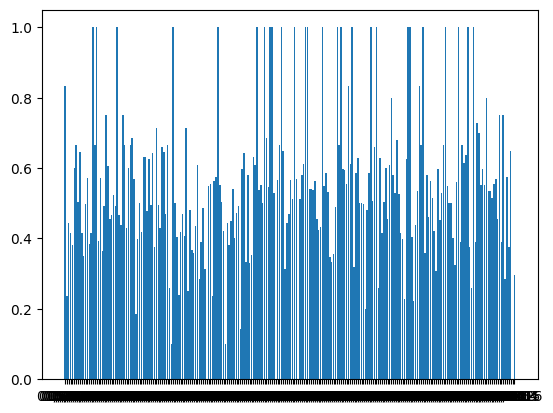

In [ ]:
plt.bar(years, props)
plt.show()

In [ ]:
years

{'01/2009',
 '01/2010',
 '01/2011',
 '01/2012',
 '01/2013',
 '01/2014',
 '01/2015',
 '01/2016',
 '02/2009',
 '02/2010',
 '02/2011',
 '02/2012',
 '02/2013',
 '02/2014',
 '02/2015',
 '02/2016',
 '03/2009',
 '03/2010',
 '03/2011',
 '03/2012',
 '03/2013',
 '03/2014',
 '03/2015',
 '03/2016',
 '04/2009',
 '04/2010',
 '04/2011',
 '04/2012',
 '04/2013',
 '04/2014',
 '04/2015',
 '04/2016',
 '05/2009',
 '05/2010',
 '05/2011',
 '05/2012',
 '05/2013',
 '05/2014',
 '05/2015',
 '05/2016',
 '06/2010',
 '06/2011',
 '06/2012',
 '06/2013',
 '06/2014',
 '06/2015',
 '06/2016',
 '07/2010',
 '07/2011',
 '07/2012',
 '07/2013',
 '07/2014',
 '07/2015',
 '07/2016',
 '08/2009',
 '08/2010',
 '08/2011',
 '08/2012',
 '08/2013',
 '08/2014',
 '08/2015',
 '08/2016',
 '09/2010',
 '09/2011',
 '09/2012',
 '09/2013',
 '09/2014',
 '09/2015',
 '09/2016',
 '10/2010',
 '10/2011',
 '10/2012',
 '10/2013',
 '10/2014',
 '10/2015',
 '10/2016',
 '11/2009',
 '11/2010',
 '11/2011',
 '11/2012',
 '11/2013',
 '11/2014',
 '11/2015',
 '11